In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../../1_Simulation_Results/numpy_files/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [3]:
model_RingTDB = np.load(path+'/Ring/TDB/Ring_TDB.npz')

LIQ_RT     = model_RingTDB['arr1']
FCC_RT     = model_RingTDB['arr2']
vel_RT     = model_RingTDB['arr3']
temp_RT    = model_RingTDB['arr4']
timeS_RT  = model_RingTDB['arr5']

time_steps_RT =  timeS_RT.shape[0]

### Phases

In [4]:
def update_plot(t_step):
    scan_speed = r'30 $\mathbf{\mu m/s}$'
    power = r"25 $\mathbf{mW}$"
    
    laser_speed = 30
    scaling_factor = 401/1000 # scaling factor for plotting figure
    laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure
    
    fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(LIQ_RT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')
    
    cmap = plt.get_cmap('Wistia')
    # cmap = cold2hot
    cmap.set_under('white', alpha=0) 
    hmap2 = ax1.imshow(FCC_RT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
    
    contour_level_LIQ = [0.8]
    contour_LIQ = plt.contour(LIQ_RT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)
    
    contour_levels = [450, 700,  1337]
    label_colors = ['k', 'k', 'aqua']
    contour = ax1.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='crimson', linewidths=3, linestyles='dashdot')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
        
    if timeS_RT[t_step] <= 25:
        ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
        ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
        if laser_act_pos < 500:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
            ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
        else:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
            ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.arrow(350, -80, 0, 76,  width = 4.5, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
        
    AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
    if timeS_RT[t_step] <= 25:
        AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    ################## Dimensions ###################
    ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
    ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)


t_steps = 515
############ To save the image as well #############
# for t_step in range(300, 515, 1):
for t_step in range(t_steps):
    update_plot(t_step)
    plt.savefig(f'../temperoray_figures/Ring/TDB/phase/f_{t_step}.png',bbox_inches='tight', dpi=100)
    plt.close() 
print("FINISHED")

FINISHED


### Temperature

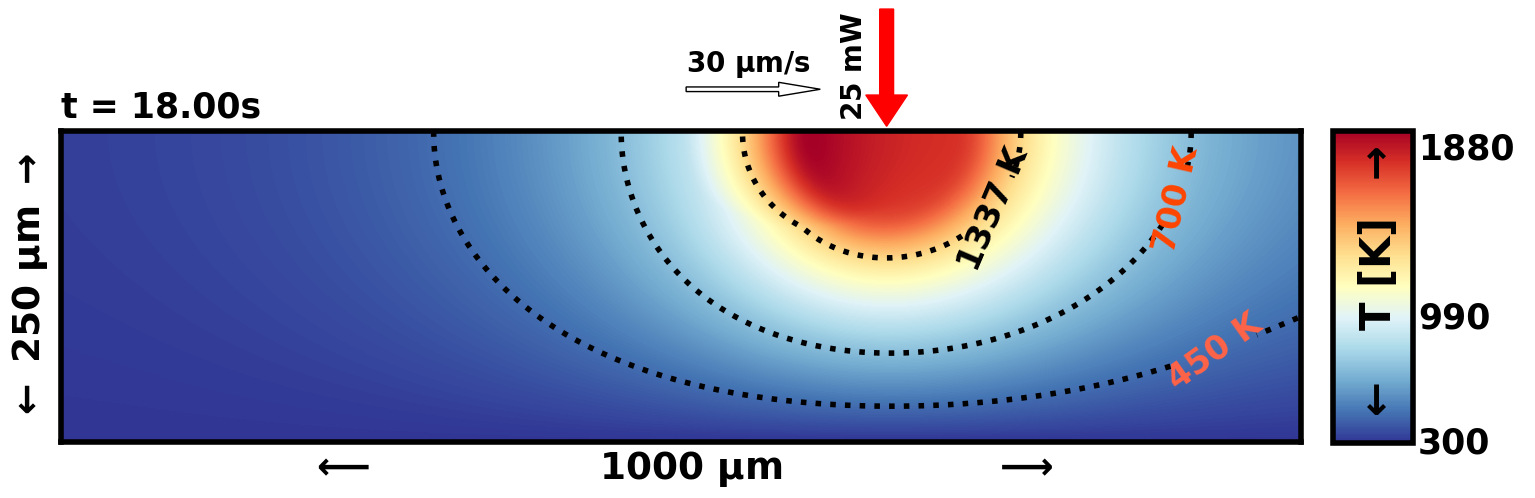

FINISHED


In [5]:
def update_plot(t_step):
    scan_speed = r'30 $\mathbf{\mu m/s}$'
    power = r"25 $\mathbf{mW}$"
    
    laser_speed = 30
    scaling_factor = 401/1000 # scaling factor for plotting figure
    laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure
    
    fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    hmap1 = ax1.imshow(temp_RT[:,:,t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
    
    if timeS_RT[t_step] <= 25:
        ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
        ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
        if laser_act_pos < 500:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
            ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
        else:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
            ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.arrow(350, -80, 0, 76,  width = 4.5, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    contour_levels = [450, 700,  1337]
    label_colors = ['tomato', 'orangered', 'k']
    contour = plt.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='black', linewidths=4, linestyles='dotted')
    [(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
    
    ################## Dimensions ###################
    ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
    ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')
    
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
    text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
    fig.add_artist(text)
    if timeS_RT[t_step] <= 25:
        cbar.set_ticks([np.min(temp_RT[:,:,t_step])*1.06, (np.max(temp_RT[:,:,t_step]))/2, np.max(temp_RT[:,:,t_step])*0.96], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{np.max(temp_RT[:,:,t_step])/2 :.0f}', f'{np.max(temp_RT[:,:,t_step])*0.95:.0f}'], weight='bold') 
    else:
        cbar.set_ticks([np.min(temp_RT[:,:,t_step]), (np.max(temp_RT[:,:,t_step])+np.min(temp_RT[:,:,t_step]))/2, np.max(temp_RT[:,:,t_step])], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{(np.max(temp_RT[:,:,t_step])+np.min(temp_RT[:,:,t_step]))/2 :.0f}', f'{np.max(temp_RT[:,:,t_step]):.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)

t_steps = 501
############ To save the image as well #############
for t_step in range(300, 301, 1):
# for t_step in range(t_steps):
    update_plot(t_step)
    # plt.savefig(f'../temperoray_figures/Ring/TDB/temperature/f_{t_step}.png',bbox_inches='tight', dpi=100)
    # plt.close() 
    plt.show()
print("FINISHED")

## Velocity

In [6]:
def update_plot(t_step):
    scan_speed = r'30 $\mathbf{\mu m/s}$'
    power = r"25 $\mathbf{mW}$"
    
    laser_speed = 30
    scaling_factor = 401/1000 # scaling factor for plotting figure
    laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
    laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure
    
    
    fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))
    
    
    hmap1 = ax1.imshow(vel_RT[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
    # AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
    # AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')
    
    ######################### Laser Arrow ###########################
    if timeS_RT[t_step] <= 25:
        ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
        ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
        if laser_act_pos < 500:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
            ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
        else:
            ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
            ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
            ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
        ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.arrow(350, -80, 0, 76,  width = 4.5, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
        
    contour_level_LIQ = [0.8]
    contour_LIQ = plt.contour(LIQ_RT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)
    
    contour_levels = [450, 700, 1337]
    contour = plt.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
    clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
    
    ax1.set_ylim(201, -1)    
    ax1.set_xlim(-1,401)
    
    for label in clabels: label.set_fontweight('bold')
        
    ################## Dimensions ###################
    ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
    ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')
    
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
    cbar.set_ticks([np.max(vel_RT[:,:,t_step])*0.06, (np.max(vel_RT[:,:,t_step]))/2, np.max(vel_RT[:,:,t_step])*0.96], labels=[f'{np.min(vel_RT[:,:,t_step]):.0f}', f'{np.max(vel_RT[:,:,t_step])/2 :.0f}', f'{np.max(vel_RT[:,:,t_step]):.0f}'], weight='bold') 
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(4)
    ax1.spines[:].set_color('b')
    ax2.spines[:].set_linewidth(4)
    line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
    fig.add_artist(line)

t_steps = 419
############ To save the image as well #############
# for t_step in range(300, 419, 1):
for t_step in range(t_steps):
    update_plot(t_step)
    plt.savefig(f'../temperoray_figures/Ring/TDB/velocity/f_{t_step}.png',bbox_inches='tight', dpi=100)
    plt.close() 
print("FINISHED")